<a href="https://colab.research.google.com/github/QasimMahmood98/machinelearning/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('COVID.csv')
df.head(7)

Saving COVID.csv to COVID.csv


,areaType,areaName,areaCode,date,W.Reg.Death,C.Reg.Death
0,overview,United Kingdom,K02000001,03/09/2021,781,157669
1,overview,United Kingdom,K02000001,27/08/2021,769,156888
2,overview,United Kingdom,K02000001,20/08/2021,654,156119
3,overview,United Kingdom,K02000001,13/08/2021,652,155465
4,overview,United Kingdom,K02000001,06/08/2021,611,154813
5,overview,United Kingdom,K02000001,30/07/2021,468,154202
6,overview,United Kingdom,K02000001,23/07/2021,392,153734


In [ ]:
#count nu
df.shape

(78, 6)

In [ ]:
#count of number
df.isna().sum()

areaType       0
areaName       0
areaCode       0
date           0
W.Reg.Death    0
C.Reg.Death    0
dtype: int64

In [ ]:
#get 0 which is good or 1 which is not good
df['W.Reg.Death'].value_counts() 

120     2
3199    1
1229    1
290     1
4259    1
       ..
93      1
4448    1
866     1
611     1
1615    1
Name: W.Reg.Death, Length: 77, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


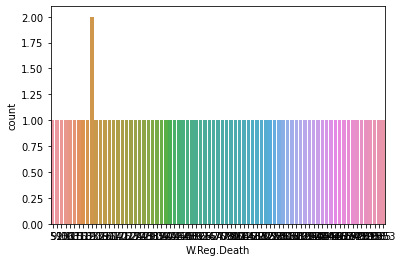

In [ ]:
#Visualise
sns.countplot(df['W.Reg.Death'], label='Count')

In [ ]:
#looking at data types
df.dtypes

areaType       object
areaName       object
areaCode       object
date           object
W.Reg.Death     int64
C.Reg.Death     int64
dtype: object

In [ ]:
#encode categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

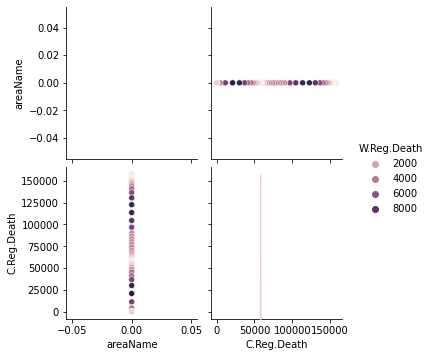

In [ ]:
#create a pair plot
sns.pairplot(df.iloc[:,1:6], hue="W.Reg.Death")

In [ ]:
#print first 5 rows of new data
df.head(5)

,areaType,areaName,areaCode,date,W.Reg.Death,C.Reg.Death
0,overview,0,K02000001,03/09/2021,781,157669
1,overview,0,K02000001,27/08/2021,769,156888
2,overview,0,K02000001,20/08/2021,654,156119
3,overview,0,K02000001,13/08/2021,652,155465
4,overview,0,K02000001,06/08/2021,611,154813


In [ ]:
#correlations 
df.iloc[:,2:6].corr()

,W.Reg.Death,C.Reg.Death
W.Reg.Death,1.000000,-0.197528
C.Reg.Death,-0.197528,1.000000


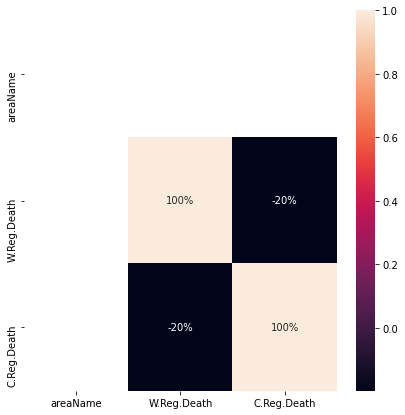

In [ ]:
#visualise
plt.figure(figsize=(7,7))
sns.heatmap(df.iloc[:,0:6].corr(), annot=True, fmt='.0%')

In [ ]:
#splitting into indep (x) And Dep (Y)
X = df.iloc[:,4:15].values #Features to determine if it has or not
Y = df.iloc[:,4].values #diagnosis

In [ ]:
#split data set into 50% training and 50% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.50, random_state=0)

In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#function for models 
def models(X_train, Y_train):

  #logic regression model
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  #decision making skills
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
  forest.fit(X_train, Y_train)

  #print accuracy
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Decision Tree classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]Random Forest classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, tree, forest

In [ ]:
#getting models
model = models (X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.20512820512820512
[1]Decision Tree classifier Training Accuracy: 1.0
[2]Random Forest classifier Training Accuracy: 0.9743589743589743


In [ ]:
#test data / testing model accuracy 
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print('Model' ,i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm [0][0]
  TN = cm [1][1]
  FN = cm [1][0]
  FP = cm [0][1]

  print(cm)
  print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
  print()

Model 0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Testing Accuracy =  nan

Model 1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing Accuracy =  nan

Model 2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Testing Accuracy =  nan



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


In [ ]:
# show another metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model' ,i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           5       0.00      0.00      0.00       1.0
          92       0.00      0.00      0.00       1.0
          93       0.00      0.00      0.00       0.0
         116       0.00      0.00      0.00       1.0
         118       0.00      0.00      0.00       1.0
         120       0.00      0.00      0.00       0.0
         132       0.00      0.00      0.00       0.0
         139       0.00      0.00      0.00       1.0
         160       0.00      0.00      0.00       1.0
         161       0.00      0.00      0.00       1.0
         170       0.00      0.00      0.00       1.0
         176       0.00      0.00      0.00       1.0
         212       0.00      0.00      0.00       1.0
         242       0.00      0.00      0.00       1.0
         268       0.00      0.00      0.00       1.0
         312       0.00      0.00      0.00       1.0
         352       0.00      0.00      0.00       1.0
         392       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
#printing prediction
pred = model[2].predict(X_test)
print (pred)
print()
print(Y_test)

[ 120 3195 6115  489  489 4259 3841  406  120  120 3201  489  769 4259
  120 6115  769  769  217  769 2252 3195 3195  119  120   93  120  489
  217  120 9553  769 6115  120 1045   93  120  769   93]

[ 242 3199 7823  866 1143 4465 6928  624  352  212 3405  670  654 6743
  176 6594  652  450  268 2280 2866 3070 3068    5  160  139  312  572
  392  161 9085  611 7771   92 4448  116  170  800  118]
